In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd

import pandas_ta as ta
from backtesting import Strategy

from ohlc import GetOHLC
from bt import BacktestingPy

Loading BokehJS ...

## Download OHLC Data

In [2]:
# Multiple Symbols
symbols = ['AAPL','GOOGL','TSLA','AMZN','MSFT','COST','NKE','JPM']

# Download OHLC Data for all symbols, store dataframes in dictionary
dfs = {}
for symbol in symbols:
    df = GetOHLC(symbol, period='100d', interval='5m').from_alpaca()
    dfs[symbol] = df

## Strategy

In [3]:
# Compose strategy using backtesting.py Strategy class

class EMAStrategy(Strategy):
    def init(self):

        self.ema8 = self.I(ta.ema, self.data.Close.s, 8, color='teal')
        self.ema50 = self.I(ta.ema, self.data.Close.s, 50, color='red')

    def next(self):

        price = self.data.Close[-1]
        ema8 = self.ema8[-1]
        ema50 = self.ema50[-1]

        if not self.position:
            if ema8 > ema50:
                self.buy()

        if self.position:
            if price < ema50 and ema8 < ema50:
                self.position.close()

## Single Ticker Test

In [4]:
aapl = BacktestingPy(EMAStrategy).quick_backtest(dfs['AAPL'])
aapl

Start                     2024-05-20 09:30:00
End                       2024-08-23 15:55:00
Duration                     95 days 06:25:00
Exposure Time [%]                   59.663222
Equity Final [$]                      10359.4
Equity Peak [$]                      11128.39
Return [%]                              3.594
Buy & Hold Return [%]               19.522479
Return (Ann.) [%]                   15.168294
Volatility (Ann.) [%]               21.018461
Sharpe Ratio                         0.721665
Sortino Ratio                        1.591469
Calmar Ratio                         1.679556
Max. Drawdown [%]                   -9.031136
Avg. Drawdown [%]                   -0.622221
Max. Drawdown Duration       72 days 00:45:00
Avg. Drawdown Duration        2 days 20:33:00
# Trades                                   84
Win Rate [%]                        28.571429
Best Trade [%]                       8.828756
Worst Trade [%]                     -1.362607
Avg. Trade [%]                    

## Multiple Ticker Test

In [10]:
mt_stats, mt_trades, mt_equity_curves = BacktestingPy(EMAStrategy, dfs).multi_ticker_backtest()

"""The outputs of multi_ticker_backtest() can be used to further analyze the results of the backtests"""

'The outputs of multi_ticker_backtest() can be used to further analyze the results of the backtests'

In [11]:
mt_stats.head()

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,Kelly Criterion
AAPL,2024-05-20 09:30:00,2024-08-23 15:55:00,95 days 06:25:00,59.663222,10359.4,11128.39,3.594,19.522479,15.168294,21.018461,...,28.571429,8.828756,-1.362607,0.043488,6 days 18:00:00,0 days 12:04:00,1.182663,0.050527,0.321713,0.534401
GOOGL,2024-05-20 09:30:00,2024-08-23 15:55:00,95 days 06:25:00,53.288591,9149.08,10177.53,-8.5092,-6.634724,-27.747225,11.575644,...,25.0,2.040476,-4.386018,-0.117998,4 days 22:40:00,0 days 14:27:00,0.657462,-0.114408,-1.213301,0.635319
TSLA,2024-05-20 09:30:00,2024-08-23 15:55:00,95 days 06:25:00,54.152315,13008.77,13695.25,30.0877,25.542828,167.509133,110.68791,...,39.130435,20.881819,-1.971499,0.3847,4 days 02:50:00,0 days 18:08:00,1.974028,0.421806,1.215257,0.602464
AMZN,2024-05-20 09:30:00,2024-08-23 15:55:00,95 days 06:25:00,53.846154,10587.5,10889.58,5.875,-4.986848,23.951811,21.331467,...,34.567901,4.405535,-1.624402,0.071103,4 days 00:45:00,0 days 12:37:00,1.311612,0.076137,0.634547,0.613809
MSFT,2024-05-20 09:30:00,2024-08-23 15:55:00,95 days 06:25:00,56.529243,8889.47,10640.34,-11.1053,-1.45716,-35.349778,9.762709,...,21.590909,2.941521,-4.2949,-0.136786,6 days 22:45:00,0 days 13:06:00,0.5621,-0.133424,-1.490031,0.600984


In [12]:
mt_trades.head()

Size  EntryBar  ExitBar  EntryPrice  ExitPrice    PnL  ReturnPct  \
AAPL 0    52        51       66      191.61     191.18 -22.36      -0.00   
     1    52        80      175      191.75     192.12  19.24       0.00   
     2    52       318      389      188.75     189.98  63.96       0.01   
     3    52       391      438      192.14     190.88 -65.52      -0.01   
     4    52       471      530      191.09     191.24   7.80       0.00   

                 EntryTime            ExitTime    SL    TP        Duration  
AAPL 0 2024-05-20 13:45:00 2024-05-20 15:00:00  None  None 0 days 01:15:00  
     1 2024-05-21 09:40:00 2024-05-22 11:05:00  None  None 1 days 01:25:00  
     2 2024-05-24 10:00:00 2024-05-24 15:55:00  None  None 0 days 05:55:00  
     3 2024-05-28 09:35:00 2024-05-28 13:30:00  None  None 0 days 03:55:00  
     4 2024-05-29 09:45:00 2024-05-29 14:40:00  None  None 0 days 04:55:00

In [6]:
mt_stats['Return [%]']

AAPL       3.594
GOOGL    -8.5092
TSLA     30.0877
AMZN       5.875
MSFT    -11.1053
COST       2.748
NKE      -7.0181
JPM       7.2246
Name: Return [%], dtype: object

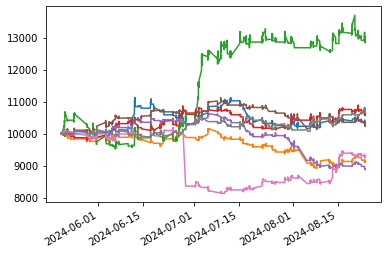

In [9]:
# Quick summary of equity curves
for symbol in symbols:
    mt_equity_curves.loc[symbol].Equity.plot()
